시계열과 같은 신호는 추세 및 노이즈와 같은 다양한 신호의 합으로 볼 수 있습니다.  
  
시계열을 여러 시계열로 분해하면 가장 중요한 정보를 유지하는 데 유용할 수 있습니다.   
하나의 분해 알고리즘은 Singular Spectrum Analysis입니다.  
이 예제는 이 알고리즘을 사용하여 시계열을 여러 하위 시리즈로 분해하는 방법을 보여주고 추출된 다른 하위 시리즈를 시각화합니다. pyts.decomposition.
  
SingularSpectrumAnalysis로 구현됩니다.

In [2]:
!pip install pyts

     |████████████████████████████████| 2.5 MB 5.2 MB/s 


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis

#Parameters
n_samples, n_timestamps = 100, 48

#Toy dataset
rng = np.random.RandomState(41)
print(rng)
X = rng.randn(n_samples, n_timestamps)
print(X)

#We decompose the time series into three subseries
window_size = 15
groups = [np.arange(i, i+5) for i in range(0, 11, 5)] #0,5,10까지?

print(groups)

RandomState(MT19937)
[[-0.27071232  0.10484805  0.25052782 ...  0.05865553  1.60971428
   0.85990674]
 [-0.98520304 -0.95836832  0.44910865 ...  1.08001575 -0.75243358
   1.15879497]
 [ 0.75087133 -1.26271269 -0.79070053 ... -1.55421805  0.27262686
  -0.5656834 ]
 ...
 [ 0.73632242 -0.00927992 -0.9345671  ... -0.27277572 -0.46268825
   0.89717774]
 [-0.43742642  0.34974187 -0.89564844 ... -0.67783247  0.89804235
   1.47615945]
 [ 0.91443154 -1.0750599  -0.26824473 ...  0.19138018  0.69816674
   1.2869462 ]]
[array([0, 1, 2, 3, 4]), array([5, 6, 7, 8, 9]), array([10, 11, 12, 13, 14])]


In [8]:
#Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=15, groups=groups)
#print(ssa)
X_ssa = ssa.fit_transform(X)
#print(X_ssa)

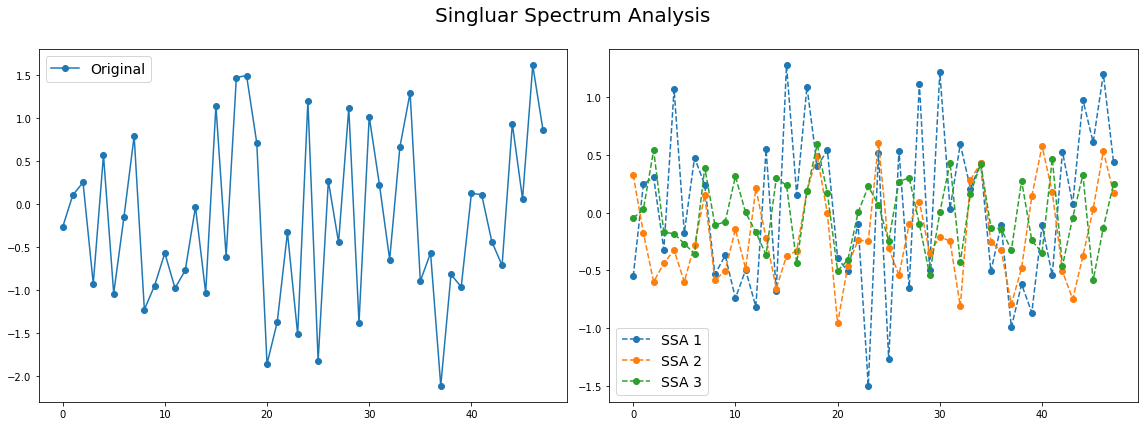

In [6]:
#Show the results for the first time series and its subseries
plt.figure(figsize=(16, 6))

ax1 = plt.subplot(121)
ax1.plot(X[0], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)):
  ax2.plot(X_ssa[0, i], 'o--', label="SSA {0}".format(i+1))
ax2.legend(loc="best", fontsize=14)

plt.suptitle("Singluar Spectrum Analysis", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()